### Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
dtime=pd.read_csv("delivery_time.csv")
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Performing EDA and Data Visualization

### Checking datatype

In [3]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null values

In [5]:
dtime.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicate values

In [6]:
dtime[dtime.duplicated()]

,Delivery Time,Sorting Time


### Plotting the data to check for outliers

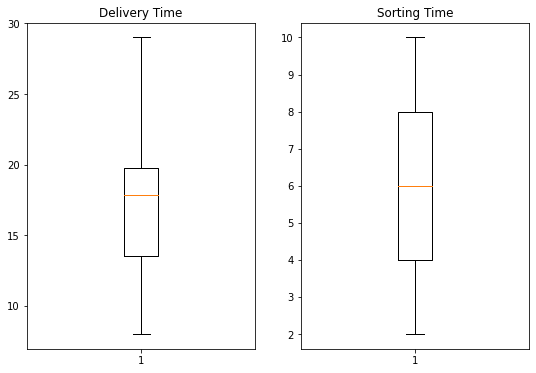

In [7]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dtime['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dtime['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [8]:
# Renaming Columns
dtime = dtime.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dtime

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

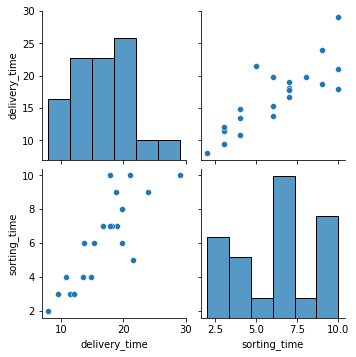

In [9]:
sns.pairplot(dtime)

In [10]:
dtime.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


### Visualization of Correlation between x and y
### Regression plot

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

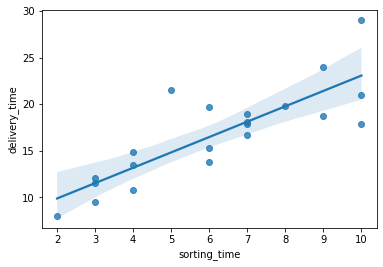

In [11]:
sns.regplot(x=dtime['sorting_time'], y=dtime['delivery_time'])

### Feature Engineering
### Trying different transformation of data to estimate normal distribution and to remove any skewness

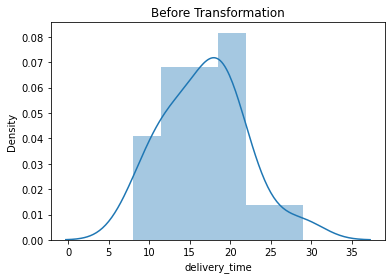

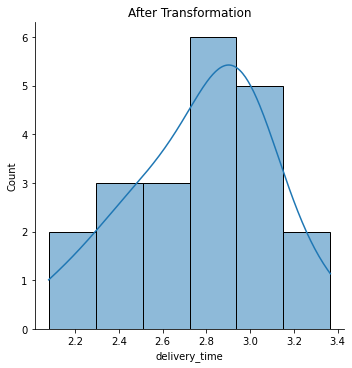

In [12]:
sns.distplot(dtime['delivery_time'], bins=6, kde=True)
plt.title('Before Transformation')
sns.displot(np.log(dtime['delivery_time']), bins=6, kde=True)
plt.title('After Transformation')
plt.show()

* Log transformation affects the data and it scales the value down.

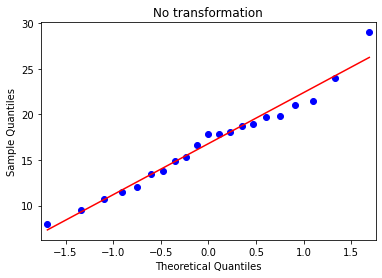

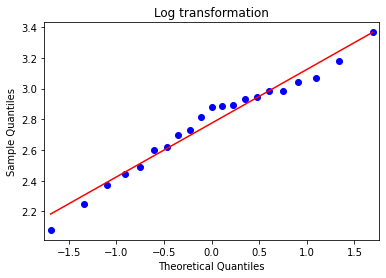

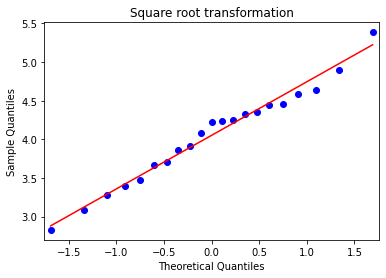

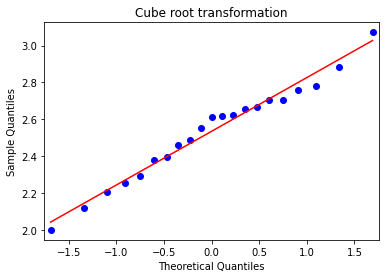

In [13]:
sm.qqplot(dtime['delivery_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(dtime['delivery_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dtime['delivery_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dtime['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

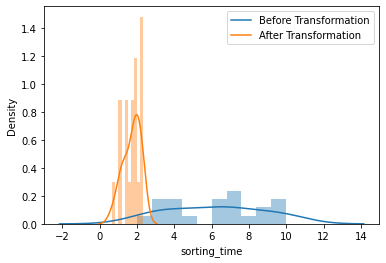

In [14]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dtime['sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(dtime['sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

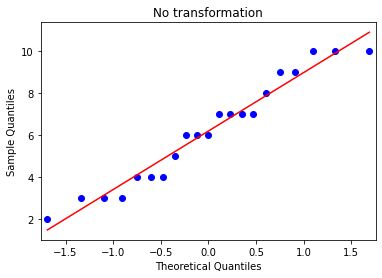

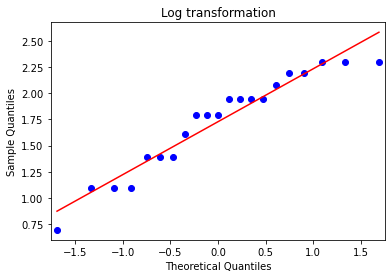

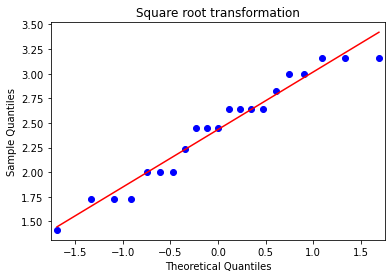

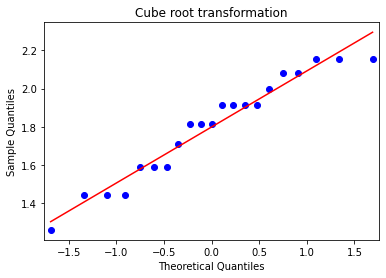

In [15]:
sm.qqplot(dtime['sorting_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(dtime['sorting_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(dtime['sorting_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(dtime['sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Model Building
### Fitting a Linear Regression Model

In [16]:
model = smf.ols('delivery_time~sorting_time',data=dtime).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 06 May 2022   Prob (F-statistic):           3.98e-06
Time:                        04:50:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The r-squared and adjusted r-squared scores are still below 0.85.
* It is a thumb rule to consider adjusted r-squared to be greater than 0.8 for a good model for prediction
* Lets try some data transformation to check whether these scores can get any higher than this.

### Square Root Transformation on data

In [18]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = dtime).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 06 May 2022   Prob (F-statistic):           8.48e-07
Time:                            04:50:38   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After Square Root transformation on the data, r-squared and adjusted r-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
* Lets try other data transformation to check whether these scores can get any higher than this.

### Cube Root transformation on Data

In [19]:
model2 = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = dtime).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 06 May 2022   Prob (F-statistic):           4.90e-07
Time:                            04:50:40   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After Cube Root transformation on the data, r-squared and adjusted r-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
* Lets try other data transformation to check whether these scores can get any higher than this.

### Log transformation on Data

In [20]:
model3 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = dtime).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 06 May 2022   Prob (F-statistic):           1.60e-07
Time:                           04:50:44   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* After log transformation on the Data, model has scored the highest r-squared and adjusted r-squared scores than the previous model
* Yet both adjusted r-squared and r-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
* Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

# Model Testing and Prediction

In [21]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [22]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [23]:
# Finding Rsquared Values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [25]:
square_root_pred_y =np.square(model1.predict(dtime['sorting_time']))
cube_root_pred_y =pow(model2.predict(dtime['sorting_time']),3)
log_model_pred_y =np.exp(model3.predict(dtime['sorting_time']))

square_root_rmse =np.sqrt(mean_squared_error(dtime['delivery_time'], square_root_pred_y))

cube_root_rmse =np.sqrt(mean_squared_error(dtime['delivery_time'], cube_root_pred_y))

log__rmse =np.sqrt(mean_squared_error(dtime['delivery_time'], log_model_pred_y))

print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=',
      cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893574 
log_model= 2.7458288976145497


### As log model has the minimum root mean square error and highest adjusted r-squared score.
### Hence we are using log model to predict our values.

### Predicting values from model with log transformation on the data

In [26]:
predicted = pd.DataFrame()
predicted['sorting_time'] = dtime.sorting_time
predicted['delivery_time'] = dtime.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model3.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Predicting from original model without any data transformation

In [27]:
predicted = pd.DataFrame()
predicted['sorting_time'] = dtime.sorting_time
predicted['delivery_time'] = dtime.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted.sorting_time))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# Model Predictions (Mannual)

In [28]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [29]:
# Automatic Prediction for say sorting time 5, 8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [30]:
data_pred = pd.DataFrame(new_data, columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [31]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
sal = pd.read_csv('Salary_data.csv')
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization
### Checking Data type

In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking for Null Values

In [5]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for duplicate value

In [6]:
sal[sal.duplicated()]

,YearsExperience,Salary


### Plotting the data to check for outliers

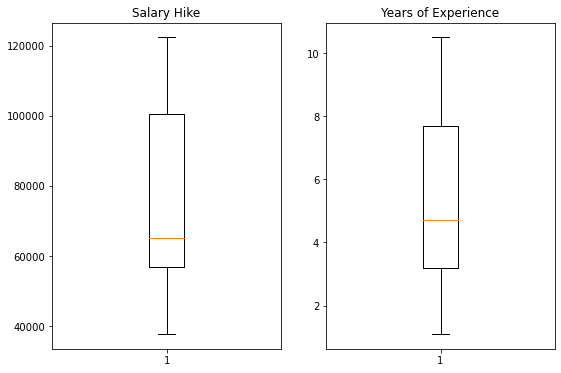

In [7]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(sal['Salary'])
plt.title('Salary Hike')
plt.subplot(1,2,2)
plt.boxplot(sal['YearsExperience'])
plt.title('Years of Experience')
plt.show()

# Correlation Analysis
#### Checking the Correlation between variables

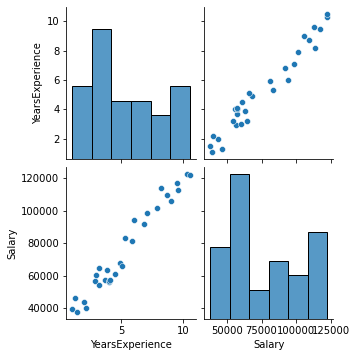

In [8]:
sns.pairplot(sal)

In [9]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Visualization of Correlation
### Regression plot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

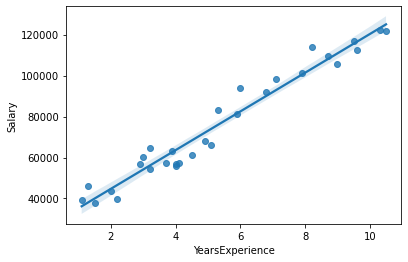

In [10]:
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'])

* There is good correlation between the two variable.
* The score is more than 0.8 which is a good sign

### Feature Engineering
### Trying different transformation of data to estimate normal distribution

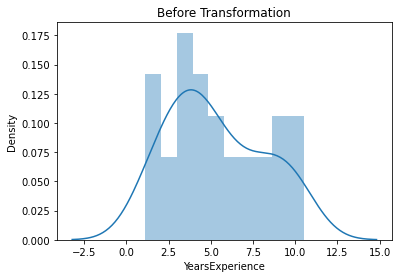

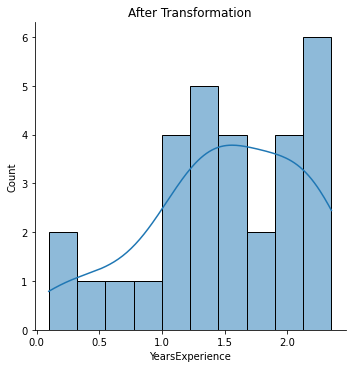

In [11]:
sns.distplot(sal['YearsExperience'], bins=10, kde=True)
plt.title('Before Transformation')
sns.displot(np.log(sal['YearsExperience']), bins=10, kde=True)
plt.title('After Transformation')
plt.show()

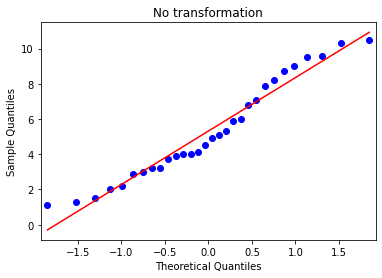

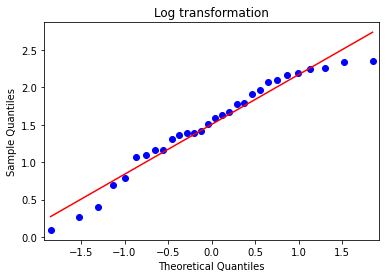

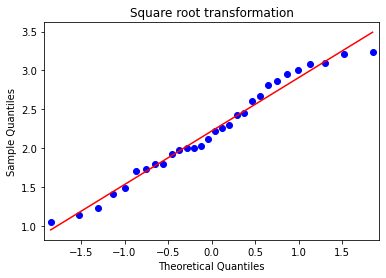

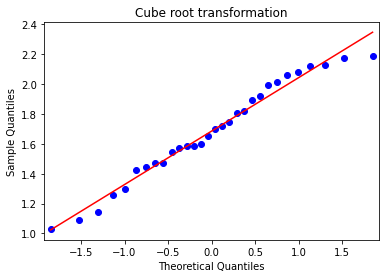

In [12]:
sm.qqplot(sal['YearsExperience'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(sal['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(sal['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(sal['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

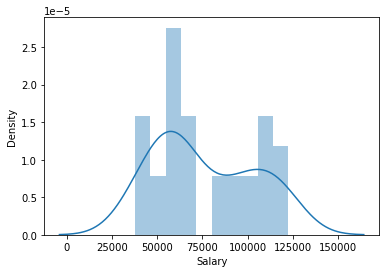

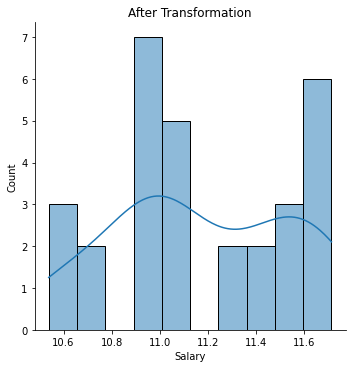

In [13]:
labels = ['Before Transformation', 'After Transformation']
sns.distplot(sal['Salary'], bins=10, kde=True)
sns.displot(np.log(sal['Salary']), bins=10, kde=True)
plt.title('After Transformation')
plt.show()

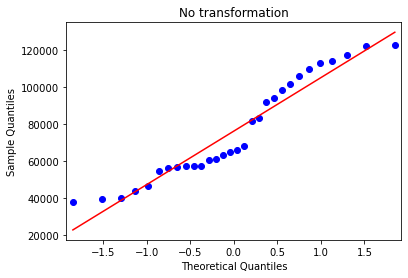

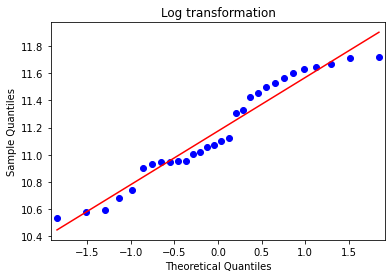

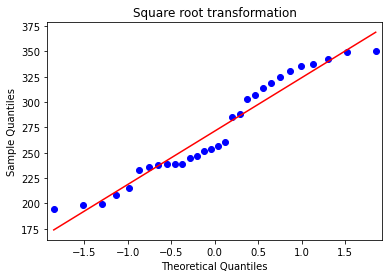

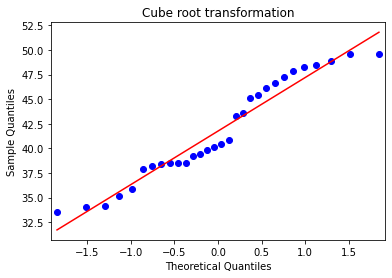

In [14]:
sm.qqplot(sal['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(sal['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(sal['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(sal['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Model Building
### Fitting a Linear Regression Model

In [15]:
model = smf.ols('Salary~YearsExperience',data=sal).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.14e-20
Time:                        00:54:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The r-squared and adjusted r-squared scores are above 0.85
* Lets try some data transformation to see whether other scores could get any better than this.

### Square Root transformation on data

In [17]:
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data=sal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 07 May 2022   Prob (F-statistic):           7.58e-19
Time:                        00:54:29   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* r-squared and adjusted r-squared scores are above 0.85 but has gotten less than previous model
* f-statistics has gotten little lower than previous model.
* log-likelihood got better
* AIC and BIC score are now much better

### Cube root transformation on Data

In [18]:
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data=sal).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 07 May 2022   Prob (F-statistic):           6.37e-18
Time:                        00:54:31   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on Data

In [19]:
model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data=sal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 07 May 2022   Prob (F-statistic):           7.40e-16
Time:                        00:54:33   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model1_pred_y =np.square(model1.predict(sal['YearsExperience']))
model2_pred_y =pow(model2.predict(sal['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(sal['YearsExperience']))

model1_rmse =np.sqrt(mean_squared_error(sal['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(sal['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(sal['Salary'], model3_pred_y))

print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119394 
model1= 5960.647096174305 
model2= 6232.815455835858 
model3= 7219.716974372787


### As model has the minimum root mean square error and highest adjusted r-squared score.
### Hence we are using model to predict our values.

# Model Testing
### Predicted Values

In [21]:
# Find Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
# Finding Pvalues and tvalues
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [23]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
#model results without any transformation
predictedval = pd.DataFrame()
predictedval['YearsExperience'] = sal.YearsExperience
predictedval['Salary'] = sal.Salary
predictedval['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predictedval.YearsExperience))
predictedval.head()

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


# Model Predictions (Mannual)

In [ ]:
# Manual prediction for say 3 Years Experience
Salary = 25792.200199 + 9449.962321 * 3
Salary

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [ ]:
newdata = pd.Series([3,5])
newdata

In [ ]:
pred = pd.DataFrame(newdata, columns=['YearsExperience'])
pred

In [ ]:
model.predict(pred)